<a href="https://colab.research.google.com/github/patbaa/physdl/blob/master/notebooks/05/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook to train your first CNN on the cifar 10 dataset

In [2]:
import os
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

%matplotlib inline

Using TensorFlow backend.


#### Loading the data and checking its shape

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Visually inspecting a few examples

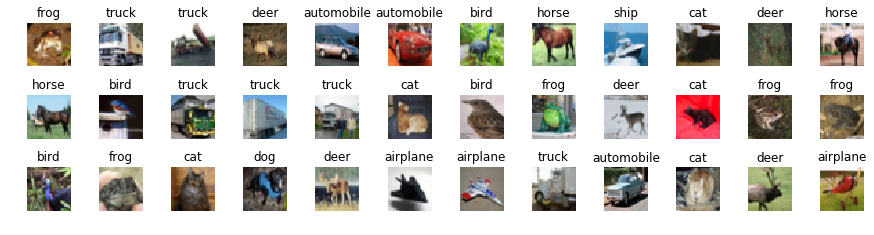

In [4]:
cifar10classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 
                  5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
fig = plt.figure(1, (15., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 12), axes_pad=0.4)

for i in range(36):
    grid[i].imshow(x_train[i])
    grid[i].set_title(cifar10classes[y_train[i][0]])
    grid[i].axis('off')

#### One-hot encoding of the categories

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test,  10)

#### Scaling the pixels from the 0-255 range to 0-1

In [6]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

#### Our first CNN

In [6]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(64, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(64, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(128, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(128, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Flatten())

cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

In [7]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 12, 12, 64)        0         
__________

In [8]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Let's train it for 20 epochs

In [9]:
cnn_history = cnn_model.fit(x_train, y_train, batch_size=32,
                            epochs=20, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 31s 628us/step - loss: 1.6916 - acc: 0.3744 - val_loss: 1.3349 - val_acc: 0.5131
Epoch 2/20
50000/50000 [==============================] - 24s 479us/step - loss: 1.2222 - acc: 0.5690 - val_loss: 1.0557 - val_acc: 0.6287
Epoch 3/20
50000/50000 [==============================] - 24s 475us/step - loss: 1.0115 - acc: 0.6487 - val_loss: 0.9950 - val_acc: 0.6618
Epoch 4/20
50000/50000 [==============================] - 24s 477us/step - loss: 0.8877 - acc: 0.6945 - val_loss: 0.8815 - val_acc: 0.6950
Epoch 5/20
50000/50000 [==============================] - 24s 478us/step - loss: 0.7953 - acc: 0.7240 - val_loss: 0.9119 - val_acc: 0.6934
Epoch 6/20
50000/50000 [==============================] - 25s 490us/step - loss: 0.7239 - acc: 0.7527 - val_loss: 0.8651 - val_acc: 0.7142
Epoch 7/20
50000/50000 [==============================] - 24s 482us/step - loss: 0.6612 - acc: 0.7719 - val_loss: 0.

#### Let's make a fully connected one for comparision

In [7]:
fc_model = Sequential()
fc_model.add(Dense(2048, activation='relu', input_dim=32*32*3))
fc_model.add(Dense(1024, activation='relu'))
fc_model.add(Dense(512,  activation='relu'))
fc_model.add(Dense(128,  activation='relu'))
fc_model.add(Dense(10,   activation='softmax'))

fc_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 8,983,434
Trainable params: 8,983,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
fc_history = fc_model.fit(x_train.reshape(50000,32*32*3), y_train, batch_size=32,
                          epochs=20, validation_data=(x_test.reshape(10000,32*32*3), y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 343us/step - loss: 1.8973 - acc: 0.3047 - val_loss: 1.6954 - val_acc: 0.3935
Epoch 2/20
50000/50000 [==============================] - 16s 317us/step - loss: 1.7002 - acc: 0.3860 - val_loss: 1.6343 - val_acc: 0.4164
Epoch 3/20
50000/50000 [==============================] - 16s 314us/step - loss: 1.6145 - acc: 0.4196 - val_loss: 1.6119 - val_acc: 0.4298
Epoch 4/20
50000/50000 [==============================] - 16s 314us/step - loss: 1.5485 - acc: 0.4434 - val_loss: 1.6163 - val_acc: 0.4217
Epoch 5/20
50000/50000 [==============================] - 16s 318us/step - loss: 1.5073 - acc: 0.4548 - val_loss: 1.4825 - val_acc: 0.4733
Epoch 6/20
50000/50000 [==============================] - 16s 315us/step - loss: 1.4663 - acc: 0.4735 - val_loss: 1.5448 - val_acc: 0.4596
Epoch 7/20
50000/50000 [==============================] - 16s 313us/step - loss: 1.4298 - acc: 0.4849 - val_loss: 1.

# Results

#### Note neither of the networks are tuned, we just want to show you an example how to make and train a CNN in keras

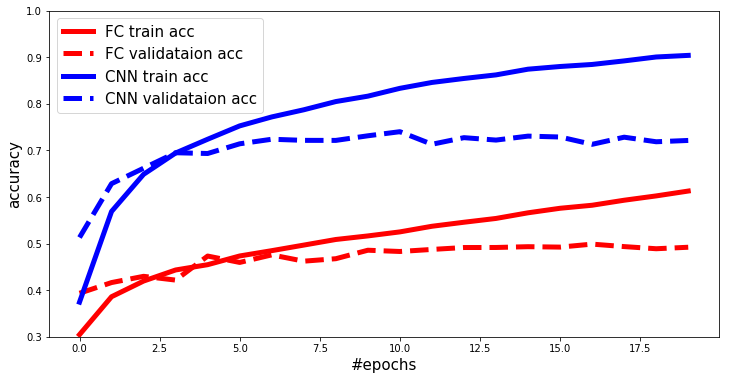

In [18]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(fc_history.history['acc'], label='FC train acc', lw=5, c='r')
plt.plot(fc_history.history['val_acc'], label='FC validataion acc', lw=5, c='r', ls='--')
plt.plot(cnn_history.history['acc'], label='CNN train acc', lw=5, c='b')
plt.plot(cnn_history.history['val_acc'], label='CNN validataion acc', lw=5, c='b', ls='--')
plt.xlabel('#epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.ylim(0.3, 1)
plt.legend(fontsize=15)
plt.show()